<a href="https://colab.research.google.com/github/robinsonlakranew/Machine-Learning-Practice/blob/main/stack_overflow_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import os, re, string

In [5]:
url = "https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"

dataset = tf.keras.utils.get_file('stackoverflow_data', url, untar=True,
                                  cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'stackoverflow')

In [8]:
train_dir = os.path.join(dataset_dir, 'train')
for i in os.listdir('train'):
  print(i)

python
javascript
csharp
java


In [15]:
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'train',
    batch_size = 32,
    validation_split = 0.2,
    seed = 33,
    subset = 'training'
)

raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'train',
    batch_size = 32,
    validation_split = 0.2,
    seed = 33,
    subset = 'validation'
)

raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'test',
    batch_size = 32
)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.
Found 8000 files belonging to 4 classes.
Using 1600 files for validation.
Found 8000 files belonging to 4 classes.


In [ ]:
for train_ds, label_ds in raw_train_ds.take(1):
  for i in train_ds:
    print(i.numpy())

In [29]:
def custom_standardization(input_text):
  lower = tf.strings.lower(input_text)
  html_stripped = tf.strings.regex_replace(lower, '<.*?>', '')
  return tf.strings.regex_replace(html_stripped, '[%s]' % re.escape(string.punctuation),
                                  '')
  
for t, l in raw_train_ds:
  for i in t:
    print(i.numpy())
    print(custom_vectorizer(i.numpy()))
    break
  break

b'"using boolean to exit loops and then redo the loops i\'m fairly new to blank, so i don\'t know too many fancy stuff and i\'m kind of stuck...what i need to do is, take a text file; import the content into an arraylist; check each line for a specific char that is between two ""#""; then check each line in the arraylist again to see if one of the lines already has that char; if it does, then i need to re-enter the whole string line and re-check it; and if it doesn\'t, then i need to put it at the bottom of the arraylist and into the text file. ..so far, i\'ve gotten to the part where i need to check if the entered line\'s char is repeating, but i can only do it once. if, for example, i enter it again i would get an indexoutofboundsexception because of one of the loops. so, i figured i\'d use a boolean to exit the loops and re-enter them, but unfortunately, after entering the whole string once, it asks me to do it again in order to repeat the process because i\'m exiting and entering t

In [31]:
vectorize_layer = tf.keras.layers.TextVectorization(
    standardize=custom_standardization,
    output_sequence_length = 250,
    max_tokens = 1000,
    output_mode='int'
)

# train_text = raw_train_ds.map(lambda x,y: x)
# vectorize_layer.adapt(train_text)

In [33]:
def vectorize_fun(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

train_ds = raw_train_ds.map(vectorize_fun)
val_ds = raw_val_ds.map(vectorize_fun)
test_ds = raw_test_ds.map(vectorize_fun)

In [34]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [36]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim = 1000+1,
                                                              output_dim = 16,
                                                              ),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(4)
])

In [40]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              optimizer='adam')

In [50]:
history = model.fit(train_ds, validation_data=val_ds, epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4080 - accuracy: 0.8516 - val_loss: 0.5812 - val_accuracy: 0.7663
Epoch 2/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4058 - accuracy: 0.8533 - val_loss: 0.5835 - val_accuracy: 0.7631
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4055 - accuracy: 0.8505 - val_loss: 0.5834 - val_accuracy: 0.7663
Epoch 4/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4070 - accuracy: 0.8533 - val_loss: 0.5833 - val_accuracy: 0.7663
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4000 - accuracy: 0.8550 - val_loss: 0.5845 - val_accuracy: 0.7644
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3999 - accuracy: 0.8581 - val_loss: 0.5873 - val_accuracy: 0.7613
Epoch 7/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4035 - accuracy: 0.8542 - val_loss: 0.5852 - val_accuracy: 0.7644

In [51]:
loss, accuracy = model.evaluate(test_ds)

250/250 [==============================] - 0s 2ms/step - loss: 0.7877 - accuracy: 0.7360


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


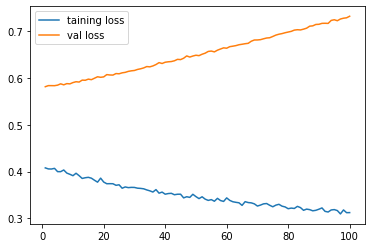

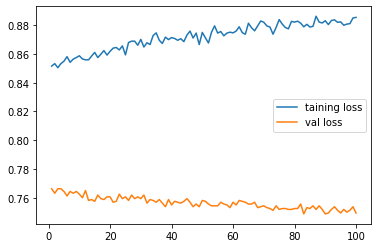

In [52]:
hist = history.history
print(hist.keys())
import matplotlib.pyplot as plt
epochs = range(1,101)

plt.plot(epochs, hist['loss'], label='taining loss')
plt.plot(epochs, hist['val_loss'], label= 'val loss')
plt.legend()
plt.show()

plt.plot(epochs, hist['accuracy'], label='taining loss')
plt.plot(epochs, hist['val_accuracy'], label= 'val loss')
plt.legend()
plt.show()

In [55]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  tf.keras.layers.Activation('sigmoid')
])

export_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=['accuracy']
)

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


250/250 [==============================] - 3s 11ms/step - loss: 0.7877 - accuracy: 0.7360
0.7360000014305115


In [56]:
examples = [
  "The movie was great!",
  "The movie was okay.",
  "The movie was terrible..."
]

export_model.predict(examples)

array([[0.63812983, 0.565464  , 0.4680301 , 0.21368039],
       [0.63812983, 0.565464  , 0.4680301 , 0.21368039],
       [0.63812983, 0.565464  , 0.4680301 , 0.21368039]], dtype=float32)